In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from scipy import stats
%matplotlib inline 

In [3]:
df = pd.read_csv('./house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('./house-prices-advanced-regression-techniques/test.csv')
df2 = pd.read_csv('./house-prices-advanced-regression-techniques/sample_submission.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_test['SalePrice'] = df2['SalePrice']
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.052498
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.393989
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.683570
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.477511
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.079977


In [5]:
print(df['SalePrice'].dtype)
print(df_test['SalePrice'].dtype)

int64
float64


In [6]:
print(df2.shape)
print(df.shape)
print(df_test.shape)

(1459, 2)
(1460, 81)
(1459, 81)


In [7]:
df_test['SalePrice'] = df_test['SalePrice'].astype('int')
print(df['SalePrice'].dtype)
print(df_test['SalePrice'].dtype)

int64
int64


In [8]:
df = pd.concat([df, df_test])
df.shape

(2919, 81)

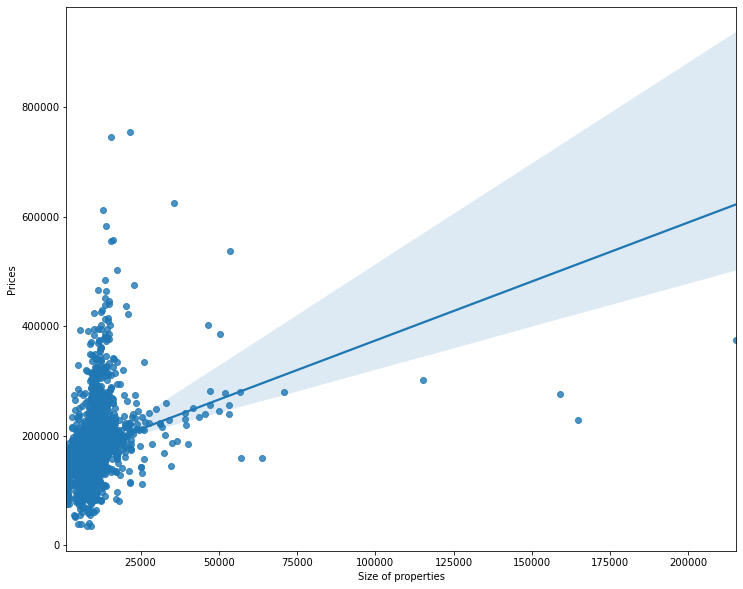

In [9]:
plt.figure(figsize=(12, 10))
sns.regplot(x='LotArea', y='SalePrice', data=df)

plt.ylabel('Prices')
plt.xlabel('Size of properties')
plt.show()

In [10]:
pearson_coef, p_value = stats.pearsonr(df['LotArea'], df['SalePrice'])

In [11]:
print('pearson_coef', pearson_coef)
print('p_value', p_value)

pearson_coef 0.296496819275991
p_value 2.574001283756116e-60


In [12]:
df[['LotArea', 'SalePrice']].corr()

,LotArea,SalePrice
LotArea,1.000000,0.296497
SalePrice,0.296497,1.000000


### Houses that have pools are more expensive?

In [ ]:
df['PoolArea'].value_counts()

0      2906
144       1
228       1
368       1
444       1
480       1
512       1
576       1
648       1
738       1
800       1
519       1
555       1
561       1
Name: PoolArea, dtype: int64

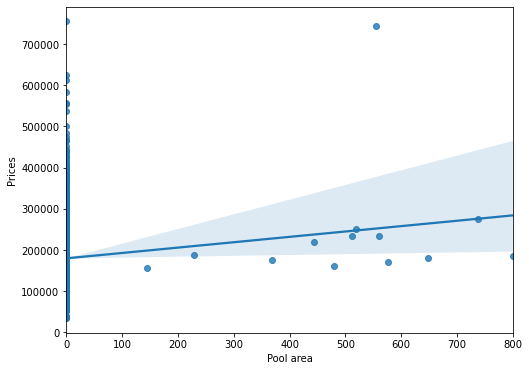

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x='PoolArea', y='SalePrice', data=df)

plt.ylabel('Prices')
plt.xlabel('Pool area')
plt.show()

In [ ]:
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.008931,-0.027549,-0.040746,-0.029771,-0.002839,-0.016581,-0.050438,-0.025219,-0.016947,...,-0.007056,0.009960,0.021609,-0.046538,0.022208,0.014332,0.008244,0.006448,-0.256050,-0.011634
MSSubClass,0.008931,1.000000,-0.417359,-0.201730,0.033638,-0.065625,0.034409,0.043315,0.005433,-0.064311,...,-0.017654,-0.015923,-0.020867,-0.037529,-0.049181,-0.003080,-0.028867,-0.001231,-0.015028,-0.087910
LotFrontage,-0.027549,-0.417359,1.000000,0.489896,0.217645,-0.075508,0.122811,0.091557,0.221079,0.219408,...,0.122070,0.164896,0.011509,0.028289,0.075858,0.174119,0.044272,0.011254,-0.007917,0.318084
LotArea,-0.040746,-0.201730,0.489896,1.000000,0.100541,-0.035617,0.024128,0.021612,0.125596,0.194031,...,0.158045,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029,0.004156,-0.024234,0.296497
OverallQual,-0.029771,0.033638,0.217645,0.100541,1.000000,-0.093847,0.597554,0.571532,0.432947,0.281810,...,0.255317,0.298084,-0.139256,0.018715,0.042910,0.030740,0.005562,0.030405,-0.019614,0.550911
OverallCond,-0.002839,-0.065625,-0.075508,-0.035617,-0.093847,1.000000,-0.368477,0.047654,-0.136007,-0.050418,...,0.020123,-0.068978,0.071044,0.043739,0.043713,-0.016876,0.033956,-0.006256,0.030102,-0.065785
YearBuilt,-0.016581,0.034409,0.122811,0.024128,0.597554,-0.368477,1.000000,0.612235,0.314051,0.279581,...,0.229426,0.198554,-0.374073,0.015958,-0.041046,0.002304,-0.010886,0.013938,-0.012344,0.362066
YearRemodAdd,-0.050438,0.043315,0.091557,0.021612,0.571532,0.047654,0.612235,1.000000,0.196875,0.152126,...,0.218513,0.242182,-0.220456,0.037433,-0.046878,-0.011407,-0.003124,0.017693,0.033203,0.350032
MasVnrArea,-0.025219,0.005433,0.221079,0.125596,0.432947,-0.136007,0.314051,0.196875,1.000000,0.303490,...,0.166200,0.144650,-0.111499,0.013612,0.065209,0.004512,0.044811,-0.000117,-0.018510,0.355608
BsmtFinSF1,-0.016947,-0.064311,0.219408,0.194031,0.281810,-0.050418,0.279581,0.152126,0.303490,1.000000,...,0.223492,0.124163,-0.099712,0.050908,0.096823,0.084462,0.093295,-0.000942,0.022556,0.272202


### Most relevant data is:
OverallQual <br>
GrLivArea <br>
GarageArea <br>
GarageCars <br>
TotRmsAbvGrd <br>
FullBath <br>
1stFlrSF <br>
TotalBsmtSF <br>


In [ ]:
df[['OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars', 'TotRmsAbvGrd', 'FullBath', '1stFlrSF', 'TotalBsmtSF', 'SalePrice']].corr()

,OverallQual,GrLivArea,GarageArea,GarageCars,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,SalePrice
OverallQual,1.000000,0.575126,0.565122,0.600744,0.389761,0.528483,0.479152,0.549294,0.550911
GrLivArea,0.575126,1.000000,0.485469,0.489933,0.808354,0.630286,0.562538,0.445276,0.588010
GarageArea,0.565122,0.485469,1.000000,0.889700,0.328687,0.408487,0.492011,0.486067,0.464809
GarageCars,0.600744,0.489933,0.889700,1.000000,0.358053,0.479988,0.440540,0.437997,0.469249
TotRmsAbvGrd,0.389761,0.808354,0.328687,0.358053,1.000000,0.527337,0.391782,0.282126,0.469800
FullBath,0.528483,0.630286,0.408487,0.479988,0.527337,1.000000,0.373077,0.327762,0.433710
1stFlrSF,0.479152,0.562538,0.492011,0.440540,0.391782,0.373077,1.000000,0.801670,0.462865
TotalBsmtSF,0.549294,0.445276,0.486067,0.437997,0.282126,0.327762,0.801670,1.000000,0.453224
SalePrice,0.550911,0.588010,0.464809,0.469249,0.469800,0.433710,0.462865,0.453224,1.000000


In [29]:
df.isna().sum()[df.isna().sum() > 0]

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64

In [17]:
df.fillna(0, inplace=True)
df_model1 = df[['OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars', 'TotRmsAbvGrd', 'FullBath', '1stFlrSF', 'TotalBsmtSF']]
df_na = {}
for column in df_model1.columns.values:
    df_na[column]= df[column].isna().value_counts()
    
df_na = pd.DataFrame(data=df_na)
df_na.head()

,OverallQual,GrLivArea,GarageArea,GarageCars,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF
False,2919,2919,2919,2919,2919,2919,2919,2919


Replacing missing values by its means:

### Using preprocessors to normalize values

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(df_model1, df['SalePrice'], test_size=0.30, random_state=1)

In [20]:
print(x_train.shape, x_test.shape)

(2043, 8) (876, 8)


In [21]:
#scaler = StandardScaler()
#df_model_norm = scaler.fit_transform(x_train)
#df_model_norm[:5]

In [22]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [23]:
Y_hat = model.predict(x_test)

/Users/christian/opt/miniconda3/envs/studies/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/christian/opt/miniconda3/envs/studies/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


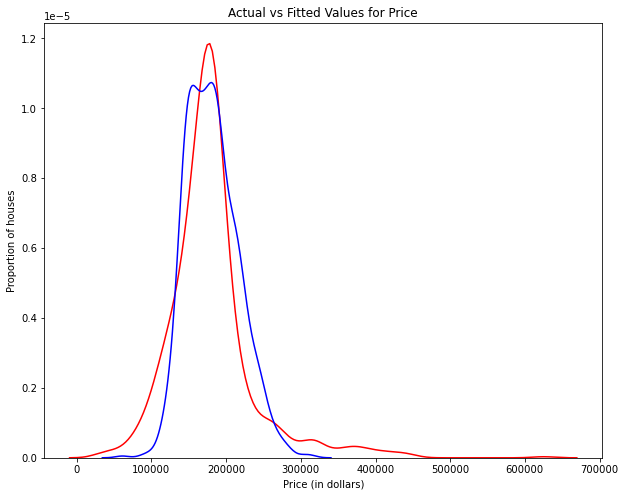

In [24]:
plt.figure(figsize=(10, 8))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of houses')

plt.show()
plt.close()

In [25]:
print('The R-square is: ', model.score(x_test, y_test))

The R-square is:  0.4822902619632785


In [26]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, Y_hat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  1720107070.7977357


(0.0, 655058.6550902402)

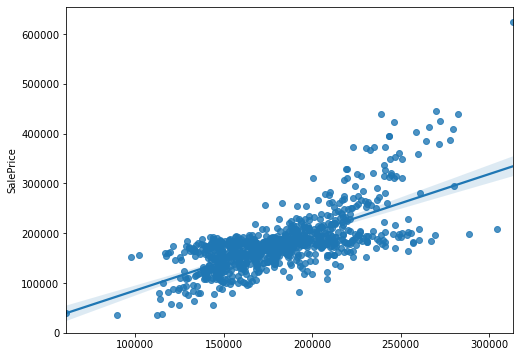

In [27]:
import seaborn as sns
width = 8
height = 6
plt.figure(figsize=(width, height))
sns.regplot(x=Y_hat, y=y_test, data=df)
plt.ylim(0,)

(0.0, 310873.56764753483)

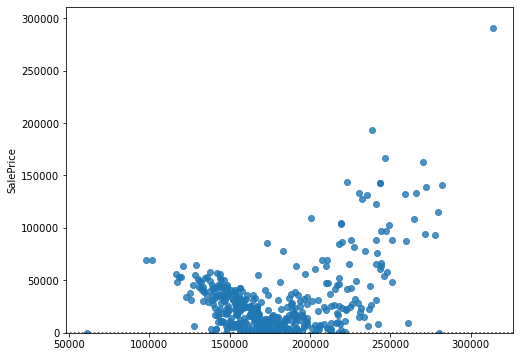

In [28]:
width = 8
height = 6
plt.figure(figsize=(width, height))
sns.residplot(x=Y_hat, y=y_test, data=df)
plt.ylim(0,)

# Next steps:
<ul>
    <li>1- Deal with missing values  OK</li> 
    <li>2- Is necessary to use a preprocessor? OK (StandardScaler)</li>
    <li>3- Adapt the model -> analyze data from train and test sets, maybe contat both and make train_test_split afterwards</li>
    <li>4- Evaluate model with Rˆ2 and Mean Squared Error (MSE)</li>
</ul>